<a href="https://colab.research.google.com/github/Nikhil5566/EDA-Repo/blob/main/UPI_Transactions_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('upi_transactions_2024.csv')
df.head(11)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
0,TXN0000000001,2024-11-05 15:30:02,P2P,Entertainment,534,SUCCESS,26-35,26-35,Rajasthan,IndusInd,SBI,Android,4G,0,15,Tuesday,0
1,TXN0000000002,2024-04-10 12:13:08,P2M,Grocery,1951,SUCCESS,26-35,26-35,Andhra Pradesh,SBI,Axis,Android,4G,0,12,Wednesday,0
2,TXN0000000003,2024-04-12 17:59:54,P2P,Grocery,388,SUCCESS,26-35,26-35,Delhi,ICICI,Kotak,iOS,4G,0,17,Friday,0
3,TXN0000000004,2024-10-22 22:59:54,P2P,Fuel,1495,SUCCESS,26-35,26-35,Rajasthan,SBI,Axis,Android,4G,0,22,Tuesday,0
4,TXN0000000005,2024-08-12 12:21:34,P2P,Shopping,4333,SUCCESS,18-25,26-35,Tamil Nadu,HDFC,HDFC,iOS,4G,0,12,Monday,0
5,TXN0000000006,2024-11-14 10:17:32,P2P,Food,113,SUCCESS,18-25,26-35,West Bengal,IndusInd,HDFC,Android,4G,0,10,Thursday,0
6,TXN0000000007,2024-02-23 19:27:04,P2P,Other,132,SUCCESS,18-25,18-25,Karnataka,Yes Bank,IndusInd,Android,4G,0,19,Friday,0
7,TXN0000000008,2024-01-14 19:17:30,P2P,Utilities,774,SUCCESS,36-45,18-25,Karnataka,HDFC,SBI,iOS,5G,0,19,Sunday,1
8,TXN0000000009,2024-08-16 11:04:59,P2P,Other,209,SUCCESS,26-35,46-55,Delhi,PNB,HDFC,Android,4G,0,11,Friday,0
9,TXN0000000010,2024-12-09 08:51:32,P2M,Grocery,648,SUCCESS,26-35,36-45,Karnataka,Kotak,Kotak,Android,4G,0,8,Monday,0


In [4]:
df.tail(11)

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
249989,TXN0000249990,2024-08-20 16:16:34,P2P,Entertainment,271,SUCCESS,26-35,36-45,Tamil Nadu,Axis,SBI,Android,WiFi,0,16,Tuesday,0
249990,TXN0000249991,2024-09-01 17:38:31,P2P,Entertainment,552,SUCCESS,26-35,26-35,Tamil Nadu,Yes Bank,SBI,Android,4G,0,17,Sunday,1
249991,TXN0000249992,2024-01-17 12:59:20,P2M,Grocery,219,SUCCESS,56+,18-25,Maharashtra,HDFC,IndusInd,Android,4G,0,12,Wednesday,0
249992,TXN0000249993,2024-12-13 11:19:29,P2P,Shopping,451,SUCCESS,46-55,18-25,Uttar Pradesh,SBI,Kotak,Android,5G,0,11,Friday,0
249993,TXN0000249994,2024-02-26 22:45:23,P2P,Other,1065,SUCCESS,18-25,26-35,Karnataka,ICICI,HDFC,Android,5G,0,22,Monday,0
249994,TXN0000249995,2024-07-29 09:53:19,P2P,Grocery,569,SUCCESS,26-35,26-35,Karnataka,SBI,SBI,Android,4G,0,9,Monday,0
249995,TXN0000249996,2024-03-01 11:30:07,Recharge,Food,1503,SUCCESS,36-45,36-45,Andhra Pradesh,ICICI,SBI,iOS,5G,0,11,Friday,0
249996,TXN0000249997,2024-03-31 16:05:06,P2P,Utilities,1995,FAILED,26-35,18-25,Andhra Pradesh,ICICI,Kotak,Android,4G,0,16,Sunday,1
249997,TXN0000249998,2024-09-07 13:41:46,P2P,Food,370,SUCCESS,26-35,36-45,Delhi,Yes Bank,SBI,Android,5G,0,13,Saturday,1
249998,TXN0000249999,2024-06-12 16:14:23,Recharge,Healthcare,335,SUCCESS,18-25,26-35,Tamil Nadu,HDFC,SBI,Android,5G,0,16,Wednesday,0


In [5]:
df.shape

(250000, 17)

In [6]:
df.columns

Index(['transaction id', 'timestamp', 'transaction type', 'merchant_category',
       'amount (INR)', 'transaction_status', 'sender_age_group',
       'receiver_age_group', 'sender_state', 'sender_bank', 'receiver_bank',
       'device_type', 'network_type', 'fraud_flag', 'hour_of_day',
       'day_of_week', 'is_weekend'],
      dtype='object')

In [7]:
df.dtypes

,0
transaction id,object
timestamp,object
transaction type,object
merchant_category,object
amount (INR),int64
transaction_status,object
sender_age_group,object
receiver_age_group,object
sender_state,object
sender_bank,object


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   transaction id      250000 non-null  object
 1   timestamp           250000 non-null  object
 2   transaction type    250000 non-null  object
 3   merchant_category   250000 non-null  object
 4   amount (INR)        250000 non-null  int64 
 5   transaction_status  250000 non-null  object
 6   sender_age_group    250000 non-null  object
 7   receiver_age_group  250000 non-null  object
 8   sender_state        250000 non-null  object
 9   sender_bank         250000 non-null  object
 10  receiver_bank       250000 non-null  object
 11  device_type         250000 non-null  object
 12  network_type        250000 non-null  object
 13  fraud_flag          250000 non-null  int64 
 14  hour_of_day         250000 non-null  int64 
 15  day_of_week         250000 non-null  object
 16  is

In [9]:
df.isnull().sum()

,0
transaction id,0
timestamp,0
transaction type,0
merchant_category,0
amount (INR),0
transaction_status,0
sender_age_group,0
receiver_age_group,0
sender_state,0
sender_bank,0


In [10]:
df.describe(include = 'all')

,transaction id,timestamp,transaction type,merchant_category,amount (INR),transaction_status,sender_age_group,receiver_age_group,sender_state,sender_bank,receiver_bank,device_type,network_type,fraud_flag,hour_of_day,day_of_week,is_weekend
count,250000,250000,250000,250000,250000.000000,250000,250000,250000,250000,250000,250000,250000,250000,250000.000000,250000.000000,250000,250000.000000
unique,250000,248632,4,10,NaN,2,5,5,10,8,8,3,4,NaN,NaN,7,NaN
top,TXN0000249984,2024-12-28 11:36:46,P2P,Grocery,NaN,SUCCESS,26-35,26-35,Maharashtra,SBI,SBI,Android,4G,NaN,NaN,Monday,NaN
freq,1,3,112445,49966,NaN,237554,88149,87735,37596,62759,62205,187798,150271,NaN,NaN,36525,NaN
mean,NaN,NaN,NaN,NaN,1247.434336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001924,14.684588,NaN,0.285672
std,NaN,NaN,NaN,NaN,1667.195776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043821,5.189991,NaN,0.451735
min,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,NaN,NaN,281.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,11.000000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,603.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,15.000000,NaN,0.000000
75%,NaN,NaN,NaN,NaN,1551.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,19.000000,NaN,1.000000


In [11]:
df.duplicated().sum()

np.int64(0)

# Handling Outliers

In [12]:
Q1 = df['amount (INR)'].quantile(0.25)
Q3 = df['amount (INR)'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q1 + 1.5 * IQR

df_outliers = df[(df['amount (INR)'] >= lower_bound) & (df['amount (INR)'] <= upper_bound)].copy()

print('Before removing Dataset:', len(df))
print('After removing Dataset:', len(df_outliers))

Before removing Dataset: 250000
After removing Dataset: 207056


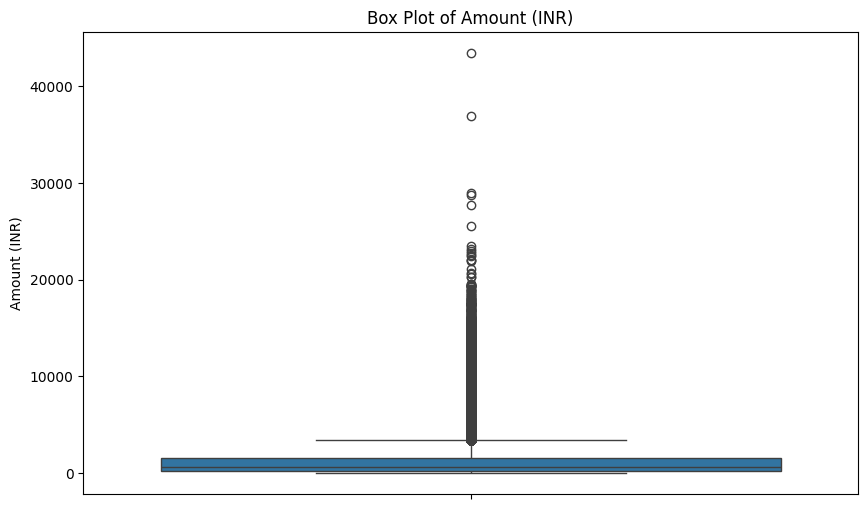

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='amount (INR)')
plt.title('Box Plot of Amount (INR)')
plt.ylabel('Amount (INR)')
plt.show()

# Univariate Analysis

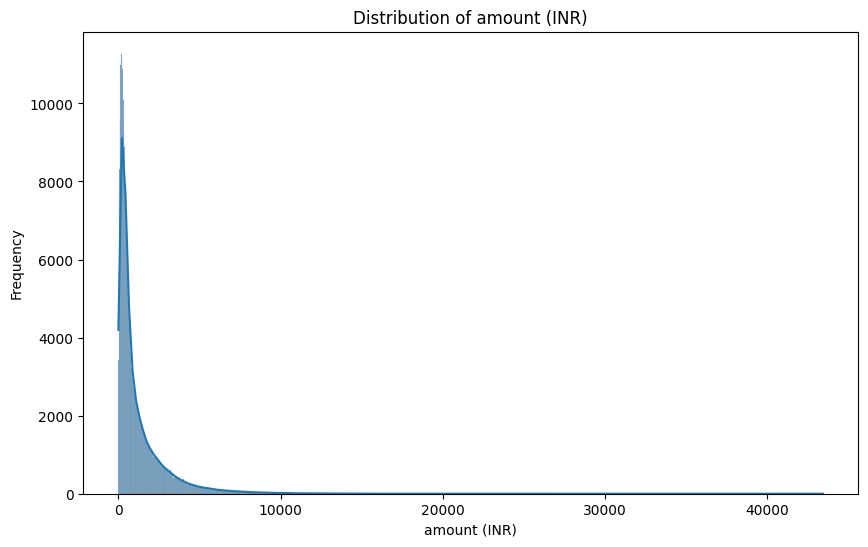

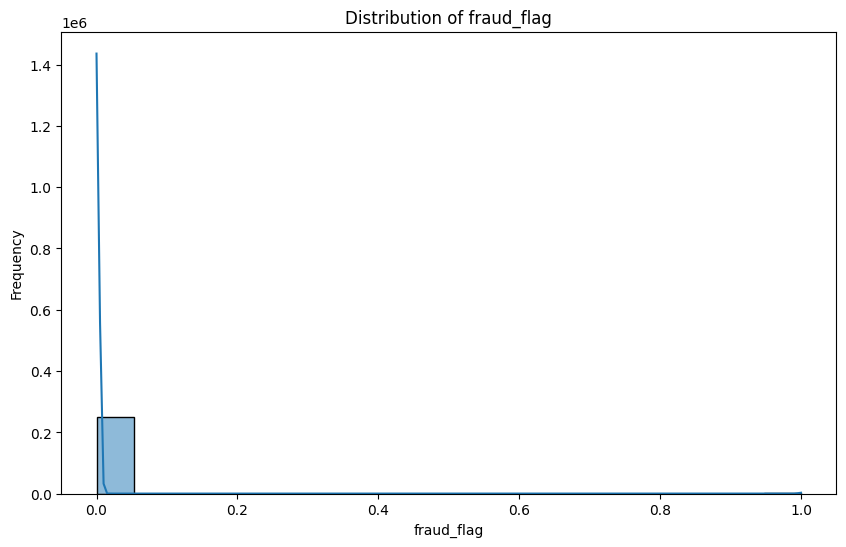

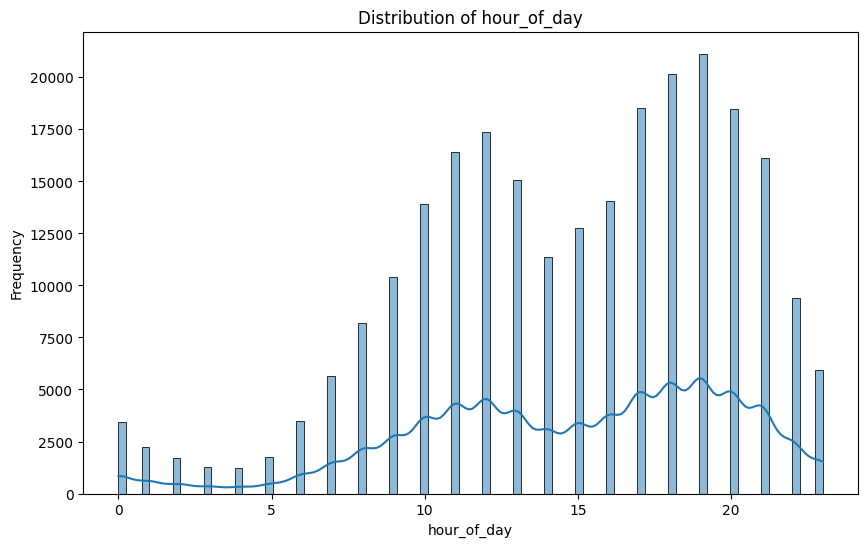

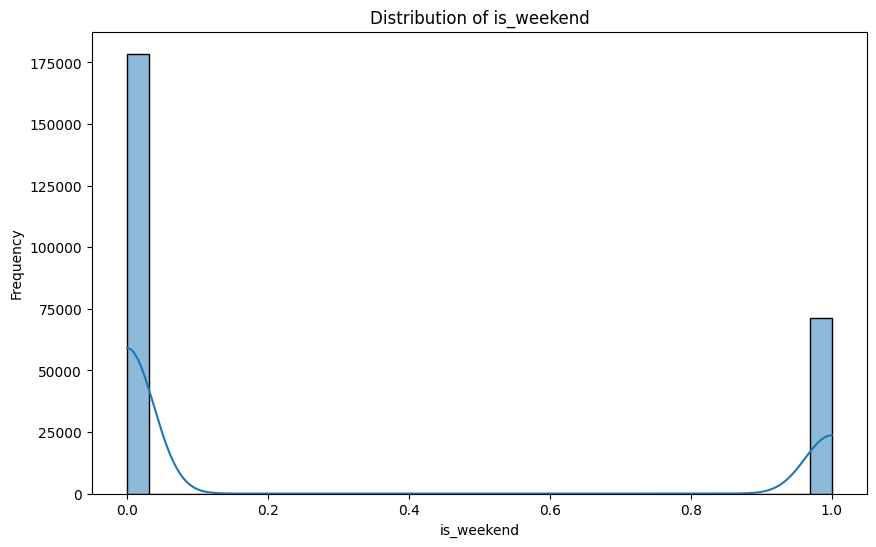

KeyboardInterrupt: 

In [ ]:
# Get a list of numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Iterate through numerical columns and create histograms
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=col, kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Get a list of categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Iterate through categorical columns and create countplots
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

for col in categorical_cols:
    print(f"Value counts for {col}:\n{df[col].value_counts()}\n")